In [1]:
# source: https://www.kaggle.com/datasets/martinellis/synthetic-lego-images/

import cv2
import torch
import logging
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from lib.lego_dataset import SynthentcLegoImagesWithMasksDataset

DATA_ROOT = Path('./datasets/synthetic-lego-images/versions/4/')

device = torch.device('cuda')
# logging.getLogger('lib.lego_dataset').setLevel(logging.ERROR)

In [2]:
train_dataset = SynthentcLegoImagesWithMasksDataset(DATA_ROOT, 'train', with_target=True)
valid_dataset = SynthentcLegoImagesWithMasksDataset(DATA_ROOT, 'valid', with_target=True)

def collate_fn(batch):
    return tuple(zip(*batch))

train_data_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=collate_fn
)

len(train_dataset), len(valid_dataset)

(8000, 2000)

In [3]:
train_dataset.annotations

,img_id,width,height,labels
0,images/rgb_10001.png,512,512,"{0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16..."
1,images/rgb_100161.png,512,512,"{0, 1, 2, 3, 9, 10, 12, 13, 15, 17, 18, 19, 21..."
2,images/rgb_100241.png,512,512,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16,..."
3,images/rgb_100481.png,512,512,"{0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1..."
4,images/rgb_100561.png,512,512,"{1, 2, 5, 7, 8, 10, 11, 13, 16, 18, 19, 20, 23..."
...,...,...,...,...
7995,images/rgb_99601.png,512,512,"{0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 16..."
7996,images/rgb_99681.png,512,512,"{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15..."
7997,images/rgb_99761.png,512,512,"{0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16..."
7998,images/rgb_99841.png,512,512,"{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15..."


In [4]:
# [n for i in range(4) for n, x in enumerate(train_dataset._get(i)[1]) if x.any()]

In [4]:
it = iter(train_data_loader)

Cannot find segmentation mask for label 5 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102241.png
Cannot find segmentation mask for label 8 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102241.png
Cannot find segmentation mask for label 19 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102241.png
Cannot find segmentation mask for label 23 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102241.png
Cannot find segmentation mask for label 31 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102241.png
Cannot find segmentation mask for label 50 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102241.png
Cannot find segmentation mask for label 5 on datasets/synthetic-lego-images/versions/4/semantic-segmentation/segmentation_102321.png
Cannot find segmentation mask for label 8 on datasets/synthetic-l

Labels: [0, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 65, 66, 68, 72]


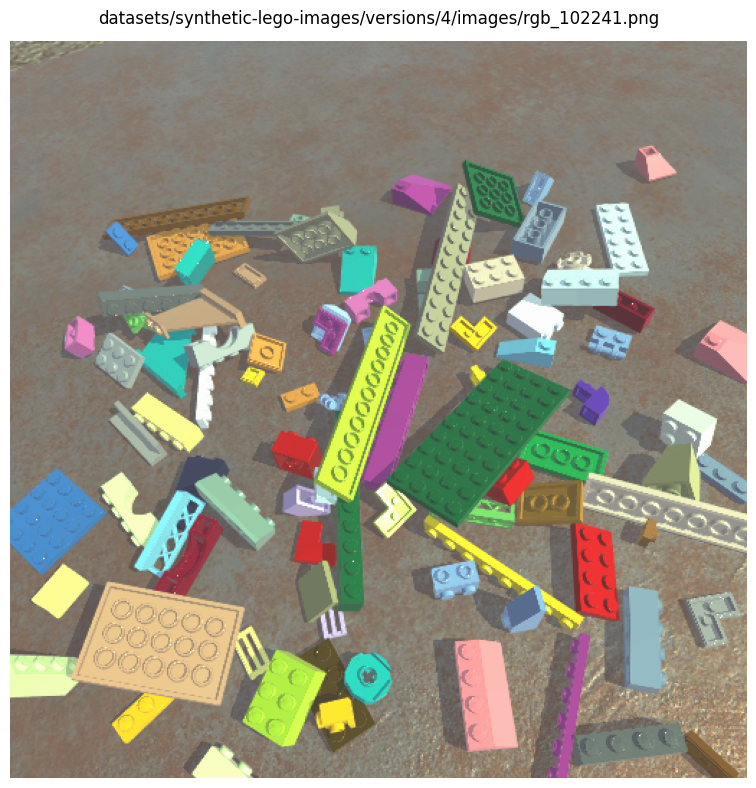

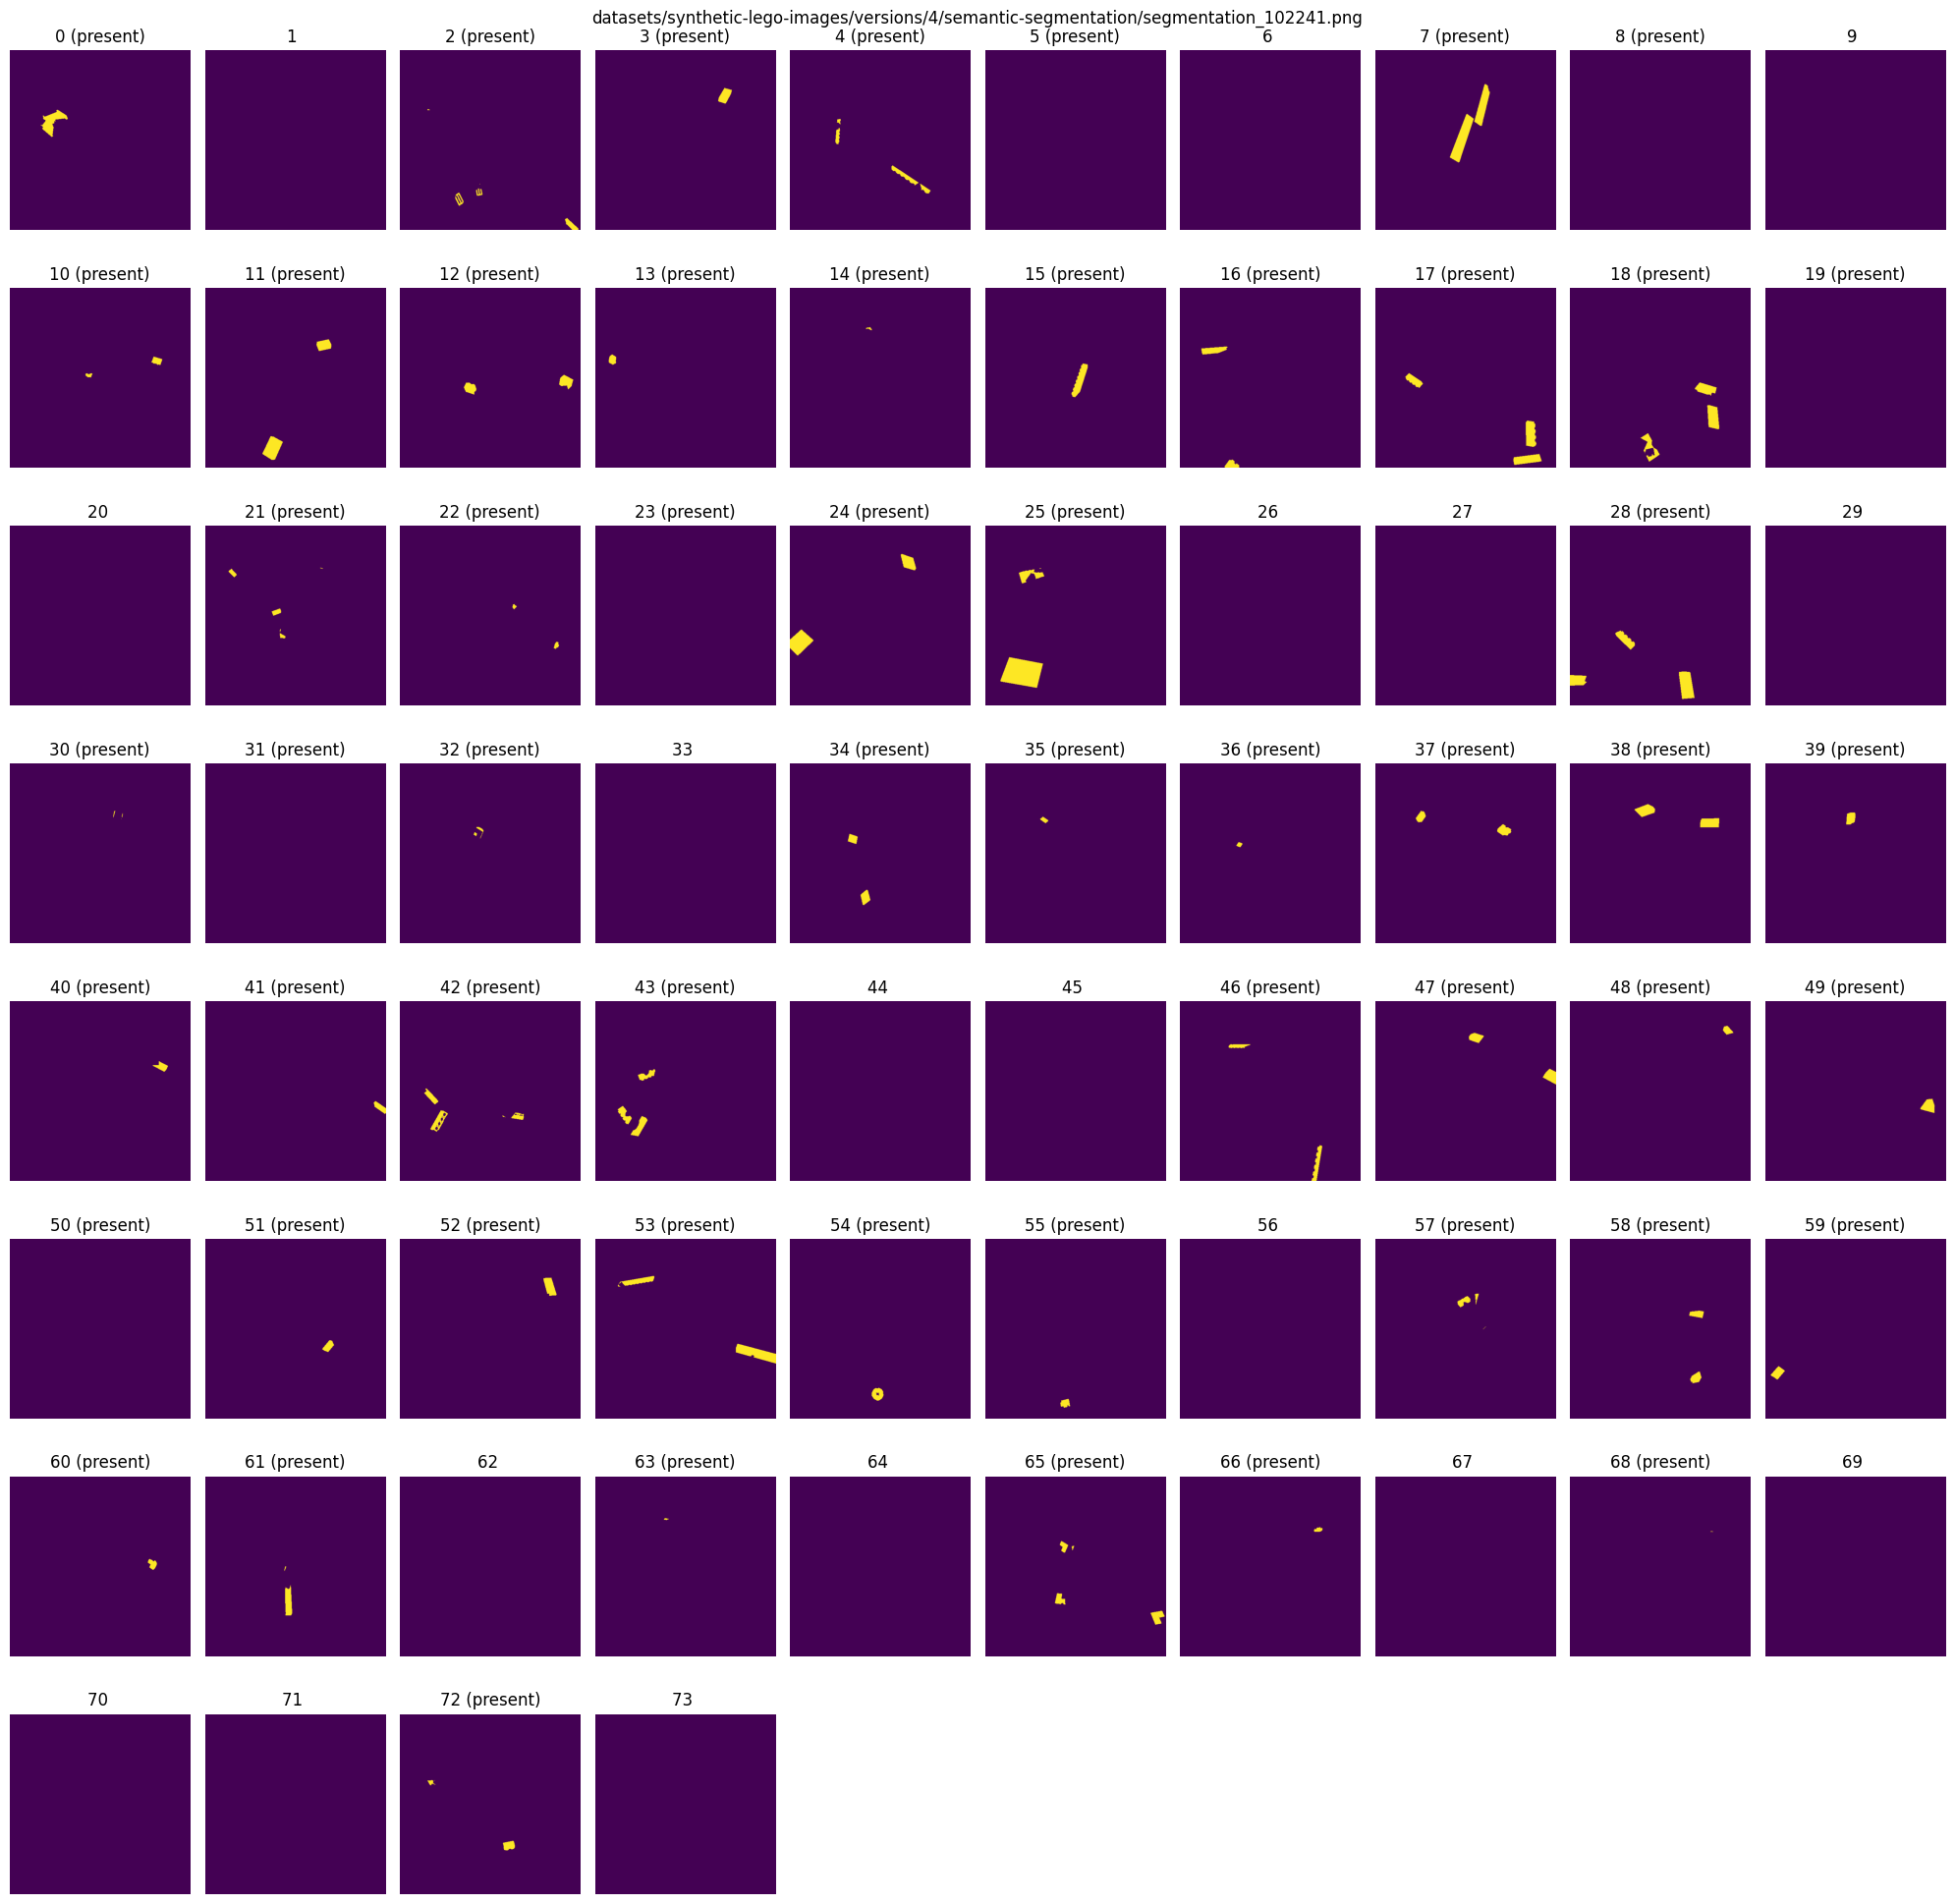

In [12]:
images, masks, targets = next(it)

image = images[0]
target = targets[0]
print(f"Labels: {target['labels']}")

fig = plt.figure(figsize=(8,8))
fig.suptitle(target["image_fn"])
plt.imshow(image.permute(1,2,0).cpu().numpy())
plt.axis('off')
fig.tight_layout()

fig = plt.figure(figsize=(20,20))
fig.suptitle(f"{target["mask_fn"]}")
for i, mask in enumerate(masks[0]):
    y = mask.cpu().numpy()
    # y = image.permute(1,2,0).cpu().numpy().copy()
    # y[ mask.numpy() == 0] = 0

    ax = plt.subplot(8, 10, i+1)
    ax.axis('off')
    ax.set_title(f'{i} {"(present)" if i in target["labels"] else ""}')
    ax.imshow(y)

_ = fig.tight_layout()

# fig, axs = plt.subplots(1,2, figsize=(20,10))
# fig.suptitle(f'{target["image_fn"]}:{target["label"]}')
# x = image.permute(1,2,0).cpu().numpy()
# axs[0].imshow(x)
# axs[0].axis('off')
# y = x.copy()
# y[ masks[0][target['label']].numpy() == 0] = 0
# axs[1].imshow(y)
# axs[1].axis('off')
# _ = fig.tight_layout()

In [6]:
images[0].shape, images[0].dtype, masks[0].shape, masks[0].dtype

(torch.Size([3, 512, 512]),
 torch.float32,
 torch.Size([74, 512, 512]),
 torch.float32)

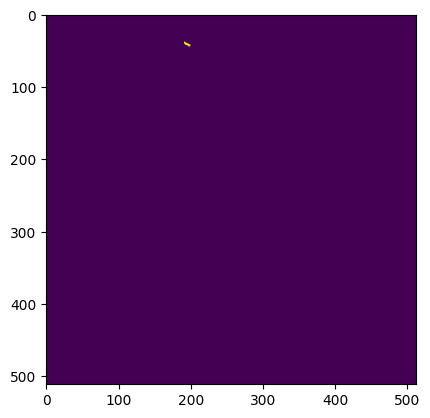

In [ ]:
# sample = train_dataset[0]
# plt.imshow(sample[0].cpu().numpy().transpose(1, 2, 0))
# plt.imshow(sample[1].cpu().numpy().sum(axis=0))

In [8]:
# train_dataset = SynthentcLegoImagesWithMasksDataset(DATA_ROOT, 'train', with_target=False)

# train_data_loader = DataLoader(
#     train_dataset,
#     batch_size=4,
#     shuffle=False,
#     collate_fn=collate_fn
# )

# x = next(iter(train_data_loader))

In [9]:

# plt.figure(figsize=(20,40))
# for i, (image, target, mask) in enumerate(zip(images, targets, masks)):
#     plt.subplot(4,2, i+1)
#     sample = np.array(mask).transpose(1,2,0)
#     plt.axis('off')
#     plt.imshow(sample)


In [10]:
# mask_reshaped = mask.permute(1, 2, 0).reshape(-1, 3)
# objects = torch.unique(mask_reshaped, dim=0)[1:]

# plt.figure(figsize=(20,20))
# for n, object_color in enumerate(objects):
#     plt.subplot(10, 10, n+1)
#     object_mask = (mask_reshaped == object_color)
#     object_mask = object_mask.all(dim=-1).reshape(mask.shape[1:])

#     empty = torch.zeros((mask.shape[1], mask.shape[2], mask.shape[0]), dtype=mask.dtype)
#     empty[object_mask, :] = object_color

#     plt.axis('off')
#     _ = plt.imshow(empty.cpu().numpy())

In [11]:
# image, masks, target = train_dataset._get(0)
# target

In [12]:
# assert target['mask_fn']
# mask_image = cv2.imread(str(target['mask_fn']), cv2.IMREAD_COLOR)
# assert mask_image
# mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(10,10))
# axs = plt.subplot(1, 2, 1)
# axs.set_title('Image')
# axs.imshow(image.permute(1, 2, 0).numpy())
# plt.axis('off')
# axs = plt.subplot(1, 2, 2)
# axs.set_title('Mask')
# axs.imshow(mask_image)
# _ = plt.axis('off')

In [13]:
# assert mask_image

# img_colors = set([tuple(x) for x in np.unique(mask_image.reshape(-1, 3), axis=0)[1:].tolist()])
# mask_colors = {tuple(clr.tolist()): id for id, clr in train_dataset.class_colors.items() if id in target['labels']}
# diff = img_colors.difference(mask_colors)
# diff

In [14]:
# plt.figure(figsize=(20,20))
# for n, (m, lbl) in enumerate(sorted(zip(masks, target['labels']), key=lambda x: x[-1])):
#     axs = plt.subplot(10, 10, n+1)
#     axs.axis('off')
#     axs.set_title(f'{lbl}: {train_dataset.classes[lbl]}')
#     axs.imshow(m, cmap='gray')